In [99]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import matplotlib.image as mpig
%matplotlib inline
import math
import argparse

# Gaussian Smoothening

In [105]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output

In [106]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D


def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)


# if __name__ == '__main__':
    
#     image = cv2.imread("lena.png")
#     gaussian_blur(image, 5, verbose=True)

# Sobel Edge Detection 

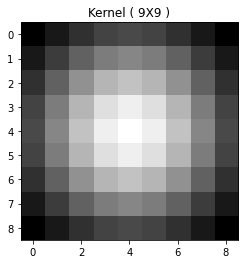

AttributeError: 'NoneType' object has no attribute 'shape'

In [107]:
def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
    
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
 
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude

if __name__ == '__main__':
        filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
        image = cv2.imread("lena.jpg")
        image1 = gaussian_blur(image, 9, verbose=True)
        sobel_edge_detection(image1, filter, verbose=True)

# Edge Detection Using Sobel,Prewitt Operator and Laplacian Operator

# Sobel Edge Detection

In [1]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

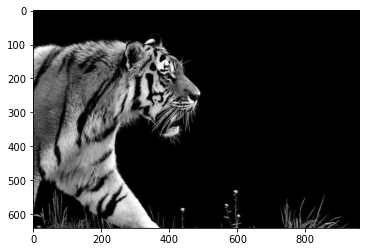

In [30]:
#read the gray scale image
image = cv2.imread('tiger.jpg',cv2.IMREAD_GRAYSCALE)
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image,cmap='gray')

In [31]:
#define horizontal and Vertical sobel kernels
Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])


In [32]:
#define kernal convolution function
# with image X and filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

In [33]:
#normalizing the vectors
sob_x = convolve(image, Gx) / 8.0
sob_y = convolve(image, Gy) / 8.0

In [34]:
#calculate the gradient magnitude of vectors
sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
# mapping values from 0 to 255
sob_out = (sob_out / np.max(sob_out)) * 255

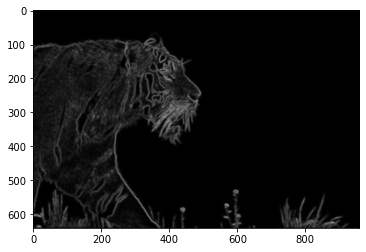

In [43]:
#output images
cv2.imwrite('sobel_tiger.jpg', sob_out)
plt.imshow(sob_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

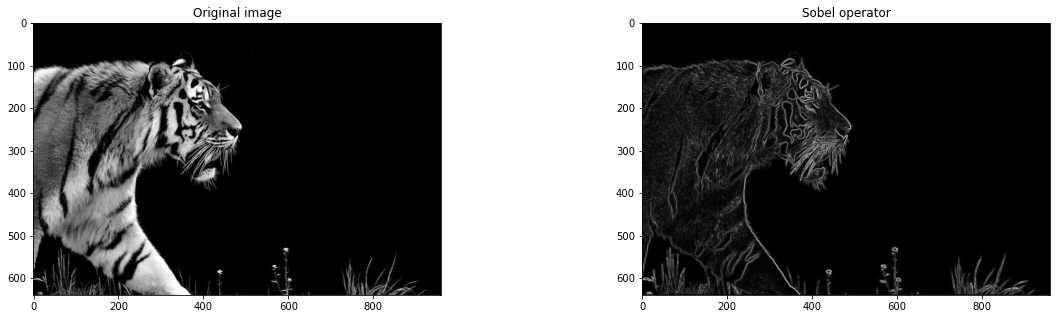

In [36]:
# Display graphics
plt.figure(figsize=(20,5))
titles = ['Original image','Sobel operator']
images = [rgb_img, sob_out]

for i in range(2):
    plt.subplot(1,2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
plt.show()

# Prewitt Operator

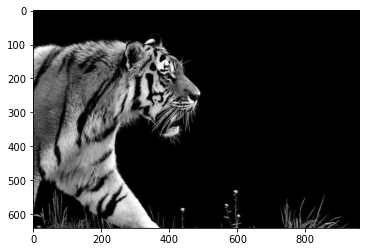

In [62]:
#read the image in gray scale
img = cv2.imread('tiger.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

In [63]:
#define horizontal and Vertical sobel kernels
Hx = np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]])
Hy = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])
print(Hx)
print("___________________________________________________________")
print(Hy)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
___________________________________________________________
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


In [64]:
#normalizing the vectors
pre_x = convolve(img, Hx) / 6.0
pre_y = convolve(img, Hy) / 6.0

In [65]:
#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

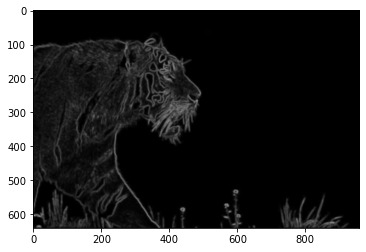

In [66]:
#output images
cv2.imwrite('prewitt_tiger.jpg', pre_out)
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

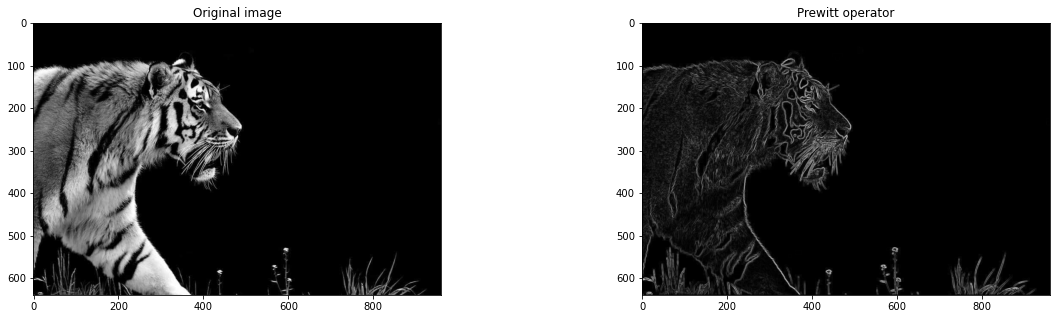

In [49]:
# Display graphics
plt.figure(figsize=(20,5))
titles = ['Original image','Prewitt operator']
images = [img, pre_out]

for i in range(2):
    plt.subplot(1,2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
plt.show()

# Using Laplacian Operator

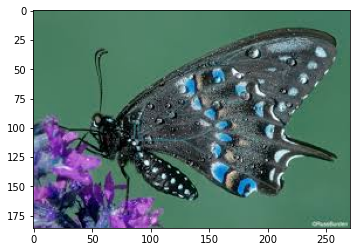

In [73]:
#read the image in gray scale
img2 = cv2.imread('butterfly.jpg',1)
plt.imshow(img2,cmap='gray')

In [74]:
#define horizontal and Vertical Laplacian kernels
Hx = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])
Hy = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
print(Hx)
print("___________________________________________________________")
print(Hy)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
___________________________________________________________
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


# Gaussian blur

In [75]:
#apply gaussian blur to reduce noise
blur_img = cv2.GaussianBlur(img2, (3, 3), 0)

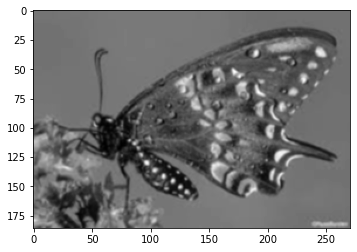

In [77]:
src_gray = cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)
plt.imshow(src_gray,cmap='gray')

In [56]:
# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

In [79]:
 #[laplacian]
    # Apply Laplace function
dst = cv2.Laplacian(src_gray, ddepth= cv2.CV_64F, ksize=3)
    # [laplacian]
    # [convert]
    # converting back to uint8
abs_dst = cv2.convertScaleAbs(dst)
    # [convert]
    # [display]
cv2.imshow("Laplace Operator", abs_dst)
k=cv2.waitKey(0)


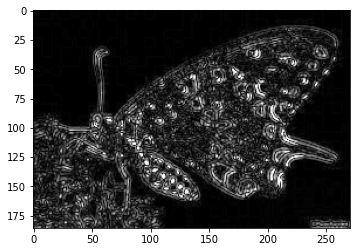

In [81]:
cv2.imwrite('lap_butterfly.jpg', abs_dst)
plt.imshow(abs_dst, cmap = 'gray')
plt.show()

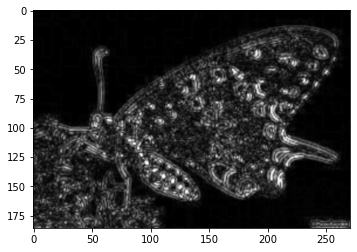

In [84]:
cv2.imwrite('lap_butterfly.jpg', abs_dst)
plt.imshow(abs_dst, cmap = 'gray', interpolation = "bicubic")
plt.show()